In [1]:
import os
import git
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

ROOT_DIR =  Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
SAVE_FIGS = True
from scipy.spatial import Delaunay


In [2]:
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
from reporting import *
plots_path = os.path.join(ROOT_DIR, "publication", "paper", "draft_plots")
main_df = main_df.copy()
main_df = main_df[main_df["failure_type"] == "pass"]
main_df["orientation"].fillna("fourier", inplace=True)
np.random.seed(0)

/var/folders/0c/5hhs4r6n7pnc4jcl295d7j_c0000gn/T/ipykernel_44455/4226471424.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_df["orientation"].fillna("fourier", inplace=True)


In [3]:
def in_hull(p, hull):
    if hasattr(hull, 'vertices') and not isinstance(hull, Delaunay):
        hull = Delaunay(hull.points)
    elif not isinstance(hull, Delaunay):
        hull = Delaunay(hull)
    return hull.find_simplex(p) >= 0

def get_hull_centroid(hull, log =False):
    # Extract ordered convex hull vertices
    polygon = hull.points[hull.vertices]
    if log:
        polygon = np.log10(polygon)

    # Close the polygon if needed
    if not np.allclose(polygon[0], polygon[-1]):
        polygon = np.vstack([polygon, polygon[0]])

    x, y = polygon[:, 0], polygon[:, 1]
    cross = x[:-1] * y[1:] - x[1:] * y[:-1]
    area = 0.5 * np.sum(cross)

    if np.isclose(area, 0):
        return np.mean(polygon, axis=0)  # fallback for degenerate polygon

    cx = np.sum((x[:-1] + x[1:]) * cross) / (6 * area)
    cy = np.sum((y[:-1] + y[1:]) * cross) / (6 * area)

    return np.array([cx, cy])
def in_hull_list(p, hulls):
   return np.any([in_hull(p, hull) for hull in hulls], axis=0)

In [4]:
x_vals = np.linspace(0, 20, 1000)
eta_vals = 1.5 + np.zeros_like(x_vals)
roi_beta = (eta_vals) / x_vals
roi = 1 / roi_beta
def line_intersects_hull(hull):
    if hull is None:
        return False
    line_points = np.column_stack((x_vals, roi))
    return np.any(in_hull(line_points, hull))
slope, intercept = 1, 1.5  # Example values for slope and intercept
# main_df['line_intersects_hull'] =
main_df['intersect_roi'] = main_df['hull'].apply(lambda h: line_intersects_hull(h))
main_df


/var/folders/0c/5hhs4r6n7pnc4jcl295d7j_c0000gn/T/ipykernel_44455/854665432.py:3: RuntimeWarning: divide by zero encountered in divide
  roi_beta = (eta_vals) / x_vals


group        obs_var      var_lower      var_upper   obs_kurt  \
3         5  249365.950000  231914.970000  267766.940000   5.788045   
4         6   43869.160000   40573.156000   47332.902000   6.932356   
5         7    6100.906000    5614.956500    6619.654300   8.188866   
6         8     432.026600     394.008500     475.633500  11.321023   
10        5  303251.500000  285966.780000  321202.030000   3.037111   
...     ...            ...            ...            ...        ...   
1144      9       0.090618       0.082436       0.099212  10.918249   
1145     10       0.010907       0.009937       0.012021  11.590162   
1151      7      10.897633      10.028848      11.798168   7.070075   
1152      8       2.093454       1.924215       2.268933   8.196066   
1153      9       0.375532       0.342325       0.410297  10.374654   

      kurt_lower  kurt_upper  total_samples  initial_r  initial_eta  ...  \
3       4.961286    6.675331       296776.0        0.1          5.7  ...   
4       5.826878    8.281218      2880648.0        0.2          0.7  ...   
5       6.884765    9.728744     25362406.0        0.4         -0.7  ...   
6       7.565761   25.109600    213093688.0        0.3         -0.5  ...   
10      2.559030    3.554282       296776.0        0.1          9.3  ...   
...          ...         ...            ...        ...          ...  ...   
1144    8.666598   14.344773       147456.0        0.4         -0.9  ...   
1145    7.492577   26.131092       589824.0        0.5         -0.9  ...   
1151    5.927161    8.451274         9216.0        0.7         -1.1  ...   
1152    7.150843    9.390152        36864.0        0.6         -1.1  ...   
1153    8.507622   12.769254       147456.0        0.4         -1.0  ...   

      dataset_type                                               hull  \
3          medical  <scipy.spatial._qhull.ConvexHull object at 0x7...   
4          medical  <scipy.spatial._qhull.ConvexHull object at 0x7...   
5          medical  <scipy.spatial._qhull.ConvexHull object at 0x7...   
6          medical  <scipy.spatial._qhull.ConvexHull object at 0x7...   
10         medical  <scipy.spatial._qhull.ConvexHull object at 0x7...   
...            ...                                                ...   
1144       natural  <scipy.spatial._qhull.ConvexHull object at 0x7...   
1145       natural  <scipy.spatial._qhull.ConvexHull object at 0x7...   
1151       natural  <scipy.spatial._qhull.ConvexHull object at 0x7...   
1152       natural  <scipy.spatial._qhull.ConvexHull object at 0x7...   
1153       natural  <scipy.spatial._qhull.ConvexHull object at 0x7...   

       best_beta  best_1/beta  beat_all_priors  best_prior  failure_category  \
3      73.000000     0.013699                1    GenGamma  practically_pass   
4      10.000000     0.100000                1    GenGamma  practically_pass   
5       2.571429     0.388889                1    GenGamma  practically_pass   
6       2.162162     0.462500                1    GenGamma  practically_pass   
10    108.000000     0.009259                1    GenGamma  practically_pass   
...          ...          ...              ...         ...               ...   
1144    2.187500     0.457143                1    GenGamma  practically_pass   
1145    1.176471     0.850000                1    GenGamma  practically_pass   
1151    0.336364     2.972973                1    GenGamma  practically_pass   
1152    0.860000     1.162791                1    GenGamma  practically_pass   
1153    1.282051     0.780000                1    GenGamma  practically_pass   

      failure_type  which_ones  intersect_roi  
3             pass         NaN           True  
4             pass         NaN           True  
5             pass         NaN           True  
6             pass         NaN           True  
10            pass         NaN           True  
...            ...         ...            ...  
1144          pass         NaN          False  
1145          pass

# Remote Sensing

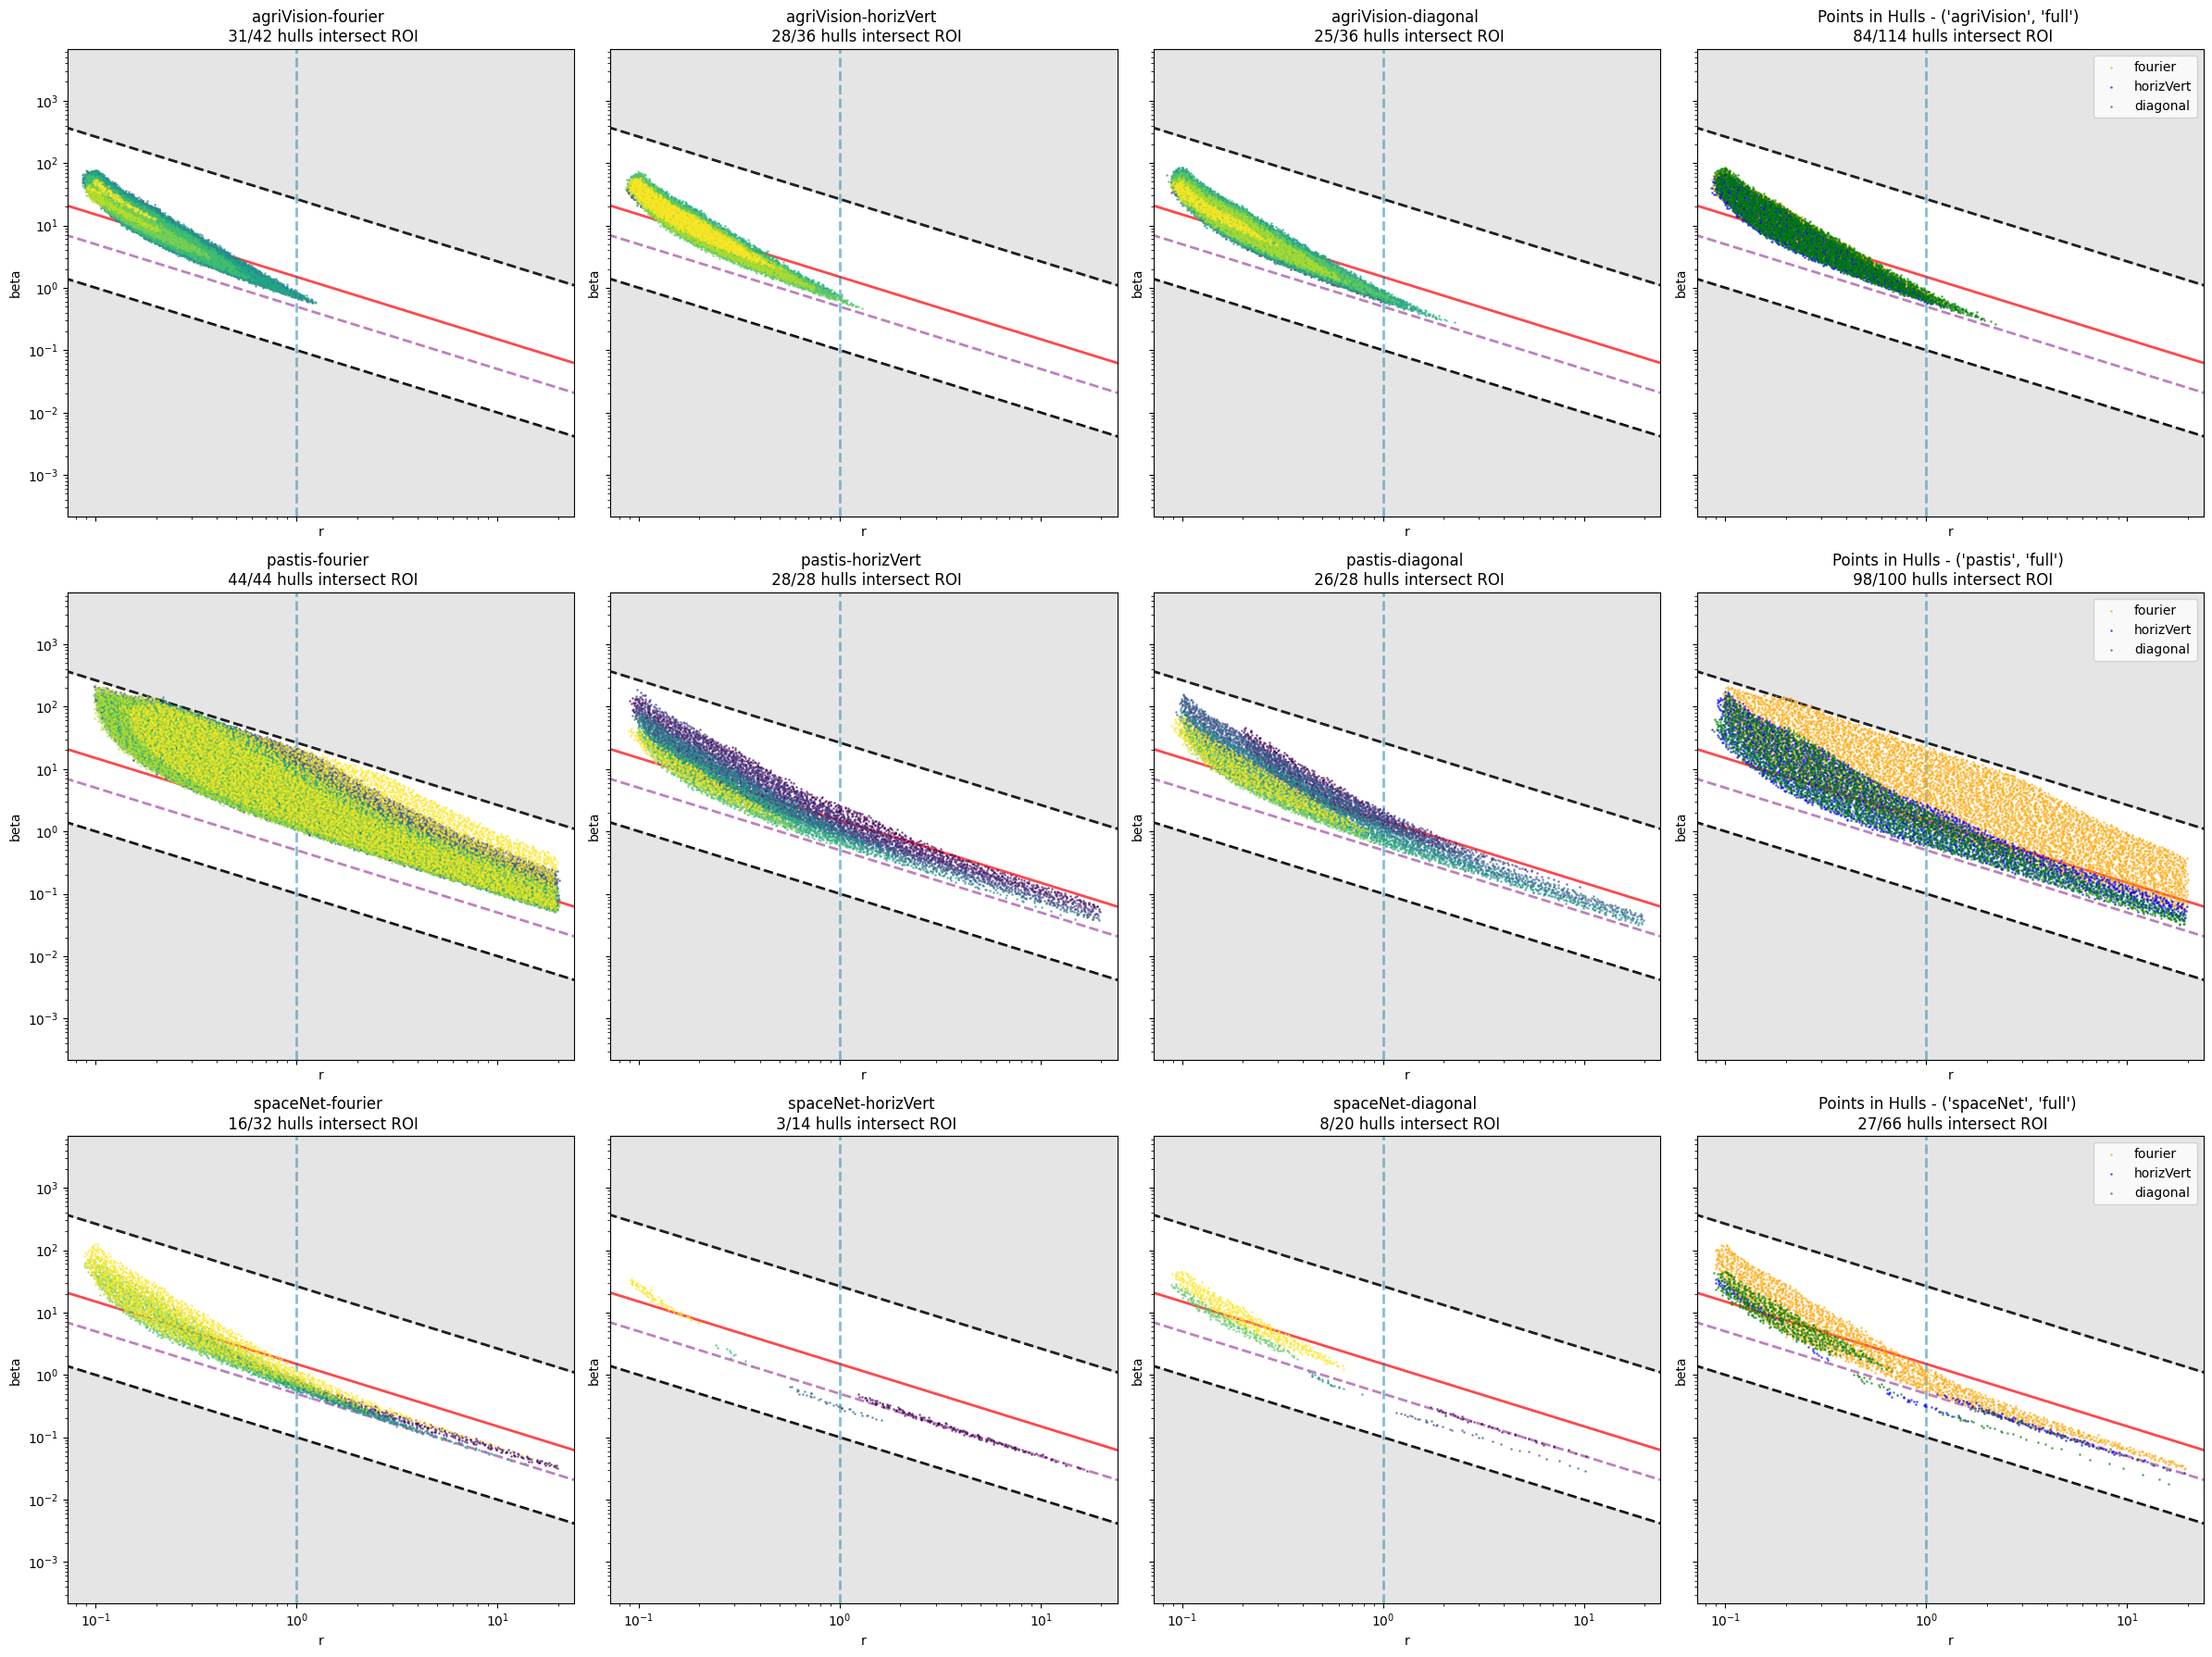

In [5]:
num_points = 150
JITTER_FACTOR = 50
size = 1
datasets = [("agriVision", "full"), ("pastis", "full"), ("spaceNet", "full")]
directions = ["fourier", "horizVert", "diagonal"]


# Add a fourth column to the right for the new plots
fig, axes = plt.subplots(3, 4, figsize=(24, 18), sharex=True, sharey=True)
global_xmax = 0
global_ymax = 0
global_xmin = np.inf
global_ymin = np.inf
for i, DATASET in enumerate(datasets):
    for j, direction in enumerate(directions):
        ax = axes[i, j]
        df = main_df[(main_df["dataset"] == DATASET[0]) & (main_df["subset"] == DATASET[1]) & (main_df["transform"] != "learned") & (main_df["orientation"] == direction)].copy()
        df = df.dropna(subset=["hull"])
        df["best_1/beta"] = 1 / df["best_beta"]
        group_list = df["group"].unique()
        hull_list = []
        all_hulls = []
        for group in group_list:
            hull_list.append(df[df["group"] == group]["hull"])
            all_hulls.extend(df[df["group"] == group]["hull"])
        if len(all_hulls) == 0:
            continue
        all_points = np.vstack([hull.points for hull in all_hulls])
        xmin, xmax = all_points[:, 0].min(), all_points[:, 0].max()
        ymin, ymax = all_points[:, 1].min(), all_points[:, 1].max()

        if xmax > global_xmax:
            global_xmax = xmax
        if ymax > global_ymax:
            global_ymax = ymax
        if xmin < global_xmin:
            global_xmin = xmin
        if ymin < global_ymin:
            global_ymin = ymin
            
        color_map = plt.get_cmap('viridis')
        num_groups = len(group_list)
        group_colors = {group: color_map(idx / max(num_groups - 1, 1)) for idx, group in enumerate(group_list)}
        x_vals = np.logspace(np.log10(xmin), np.log10(xmax), num_points)
        y_vals = np.logspace(np.log10(ymin), np.log10(ymax), num_points)
        
        xx, yy = np.meshgrid(x_vals, y_vals)
        points_grid = np.c_[xx.ravel(), yy.ravel()]
        for k, hull in enumerate(hull_list):
            hull_mask = in_hull_list(points_grid, hull)
            points = points_grid[hull_mask]
            points = points + np.random.normal(scale=points / JITTER_FACTOR, size=points.shape)
            ax.scatter(points[:, 0], 1/points[:, 1], s=size, label=group_list[k], alpha=0.5, color=group_colors[group_list[k]])
        ax.set_xlabel("r")
        ax.set_ylabel("beta")
        ax.set_xscale('log')
        ax.set_yscale('log')
        temp_df = df[df["orientation"] == direction]
        ax.set_title(f"{DATASET[0]}-{direction} \n {sum(temp_df['intersect_roi'])}/{len(temp_df)} hulls intersect ROI")

    # Fourth column: plot by orientation for each DATASET
    ax4 = axes[i, 3]
    df = main_df[(main_df["dataset"] == DATASET[0]) & (main_df["subset"] == DATASET[1]) & (main_df["transform"] != "learned")].copy()
    df = df.dropna(subset=["hull"])
    df["best_1/beta"] = 1 / df["best_beta"]
    if df["dataset_type"].unique()[0] == "remote sensing":
        df["orientation"] = df["orientation"].fillna("fourier")
    orientation_list = df["orientation"].unique()
    hull_list = []
    all_hulls = []
    for orientation in orientation_list:
        hull_list.append(df[df["orientation"] == orientation]["hull"])
        all_hulls.extend(df[df["orientation"] == orientation]["hull"])
    if len(all_hulls) == 0:
        continue
    all_points = np.vstack([hull.points for hull in all_hulls])
    xmin, xmax = all_points[:, 0].min(), all_points[:, 0].max()
    ymin, ymax = all_points[:, 1].min(), all_points[:, 1].max()
    orientation_colors = {"horizVert": "blue", "diagonal": "green", "fourier": "orange", "vertical": "purple", "horizontal": "red"}
    x_vals = np.logspace(np.log10(xmin), np.log10(xmax), num_points)
    y_vals = np.logspace(np.log10(ymin), np.log10(ymax), num_points)
    
    xx, yy = np.meshgrid(x_vals, y_vals)
    points_grid = np.c_[xx.ravel(), yy.ravel()]
    for k, hull in enumerate(hull_list):
        hull_mask = in_hull_list(points_grid, hull)
        points = points_grid[hull_mask]
        points = points + np.random.normal(scale=points / JITTER_FACTOR, size=points.shape)
        ax4.scatter(points[:, 0], 1/points[:, 1], s=size, label=orientation_list[k], alpha=0.5, color=orientation_colors[orientation_list[k]])
    ax4.set_xlabel("r")
    ax4.set_ylabel("beta")
    ax4.set_xscale('log')
    ax4.set_yscale('log')
    ax4.set_title(f"Points in Hulls - {DATASET} \n {sum(df['intersect_roi'])}/{len(df)} hulls intersect ROI")
    ax4.legend()

for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        ax = axes[i, j]
        x_vals_global = np.logspace(np.log10(global_xmin) -1 , np.log10(global_xmax+1) + 1, num_points)
        eta_vals_global = 0 * np.zeros_like(x_vals_global)
        eta_roi_lower = -0.1 * np.zeros_like(x_vals_global)
        eta_roi_upper = 0.1 * np.zeros_like(x_vals_global)
        eta_20_vals_global = 25 + np.zeros_like(x_vals_global)
        eta_lower_global = -1.4 + np.zeros_like(x_vals_global)
        eta_neg_1 = -1 + np.zeros_like(x_vals_global)
        
        roi_global = (eta_vals_global + 1.5) / x_vals_global
        roi_lower = (eta_roi_lower + 1.5) / x_vals_global
        roi_upper = (eta_roi_upper + 1.5) / x_vals_global
        beta_20_global = (eta_20_vals_global + 1.5) / x_vals_global
        beta_lower_global = (eta_lower_global + 1.5) / x_vals_global
        beta_neg_1_global = (eta_neg_1 + 1.5) / x_vals_global
        
        ax.plot(x_vals_global, roi_global, color='xkcd:light red', linestyle='-', label='ROI', zorder=0, linewidth=2)
       #ax.fill_between(x_vals_global, roi_lower, roi_upper, color='xkcd:light red')
        ax.plot(x_vals_global, beta_20_global, color='black', linestyle='--', label='ROI', zorder=0, linewidth=2)
        ax.plot(x_vals_global, beta_lower_global, color='black', linestyle='--', label='ROI', zorder=0, linewidth=2)
        ax.plot(x_vals_global, beta_neg_1_global, color='purple', linestyle='--', label='ROI', zorder=0, linewidth=2, alpha=0.5)
        ax.axvline(x=1, color='xkcd:nice blue', linestyle='--', label='r=1', zorder=0, linewidth=2, alpha=0.5)

        

        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        ax.fill_between(x_vals_global, ylim[0], beta_lower_global, color='gray', alpha=0.2)
        ax.fill_between(x_vals_global, ylim[1], beta_20_global, color='gray', alpha=0.2)

        ax.set_xlabel("r")
        ax.set_ylabel("beta")
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlim(global_xmin/1.2, global_xmax*1.2)
        ax.set_ylim(ylim)
        #ax.set_ylim(global_ymin, global_ymax)
       
plt.tight_layout()
plt.show()

    
if SAVE_FIGS:
    fig.savefig(os.path.join(plots_path, "region_pointalism_remote_sensing.png"), bbox_inches='tight', dpi=1000)

# Natural Images

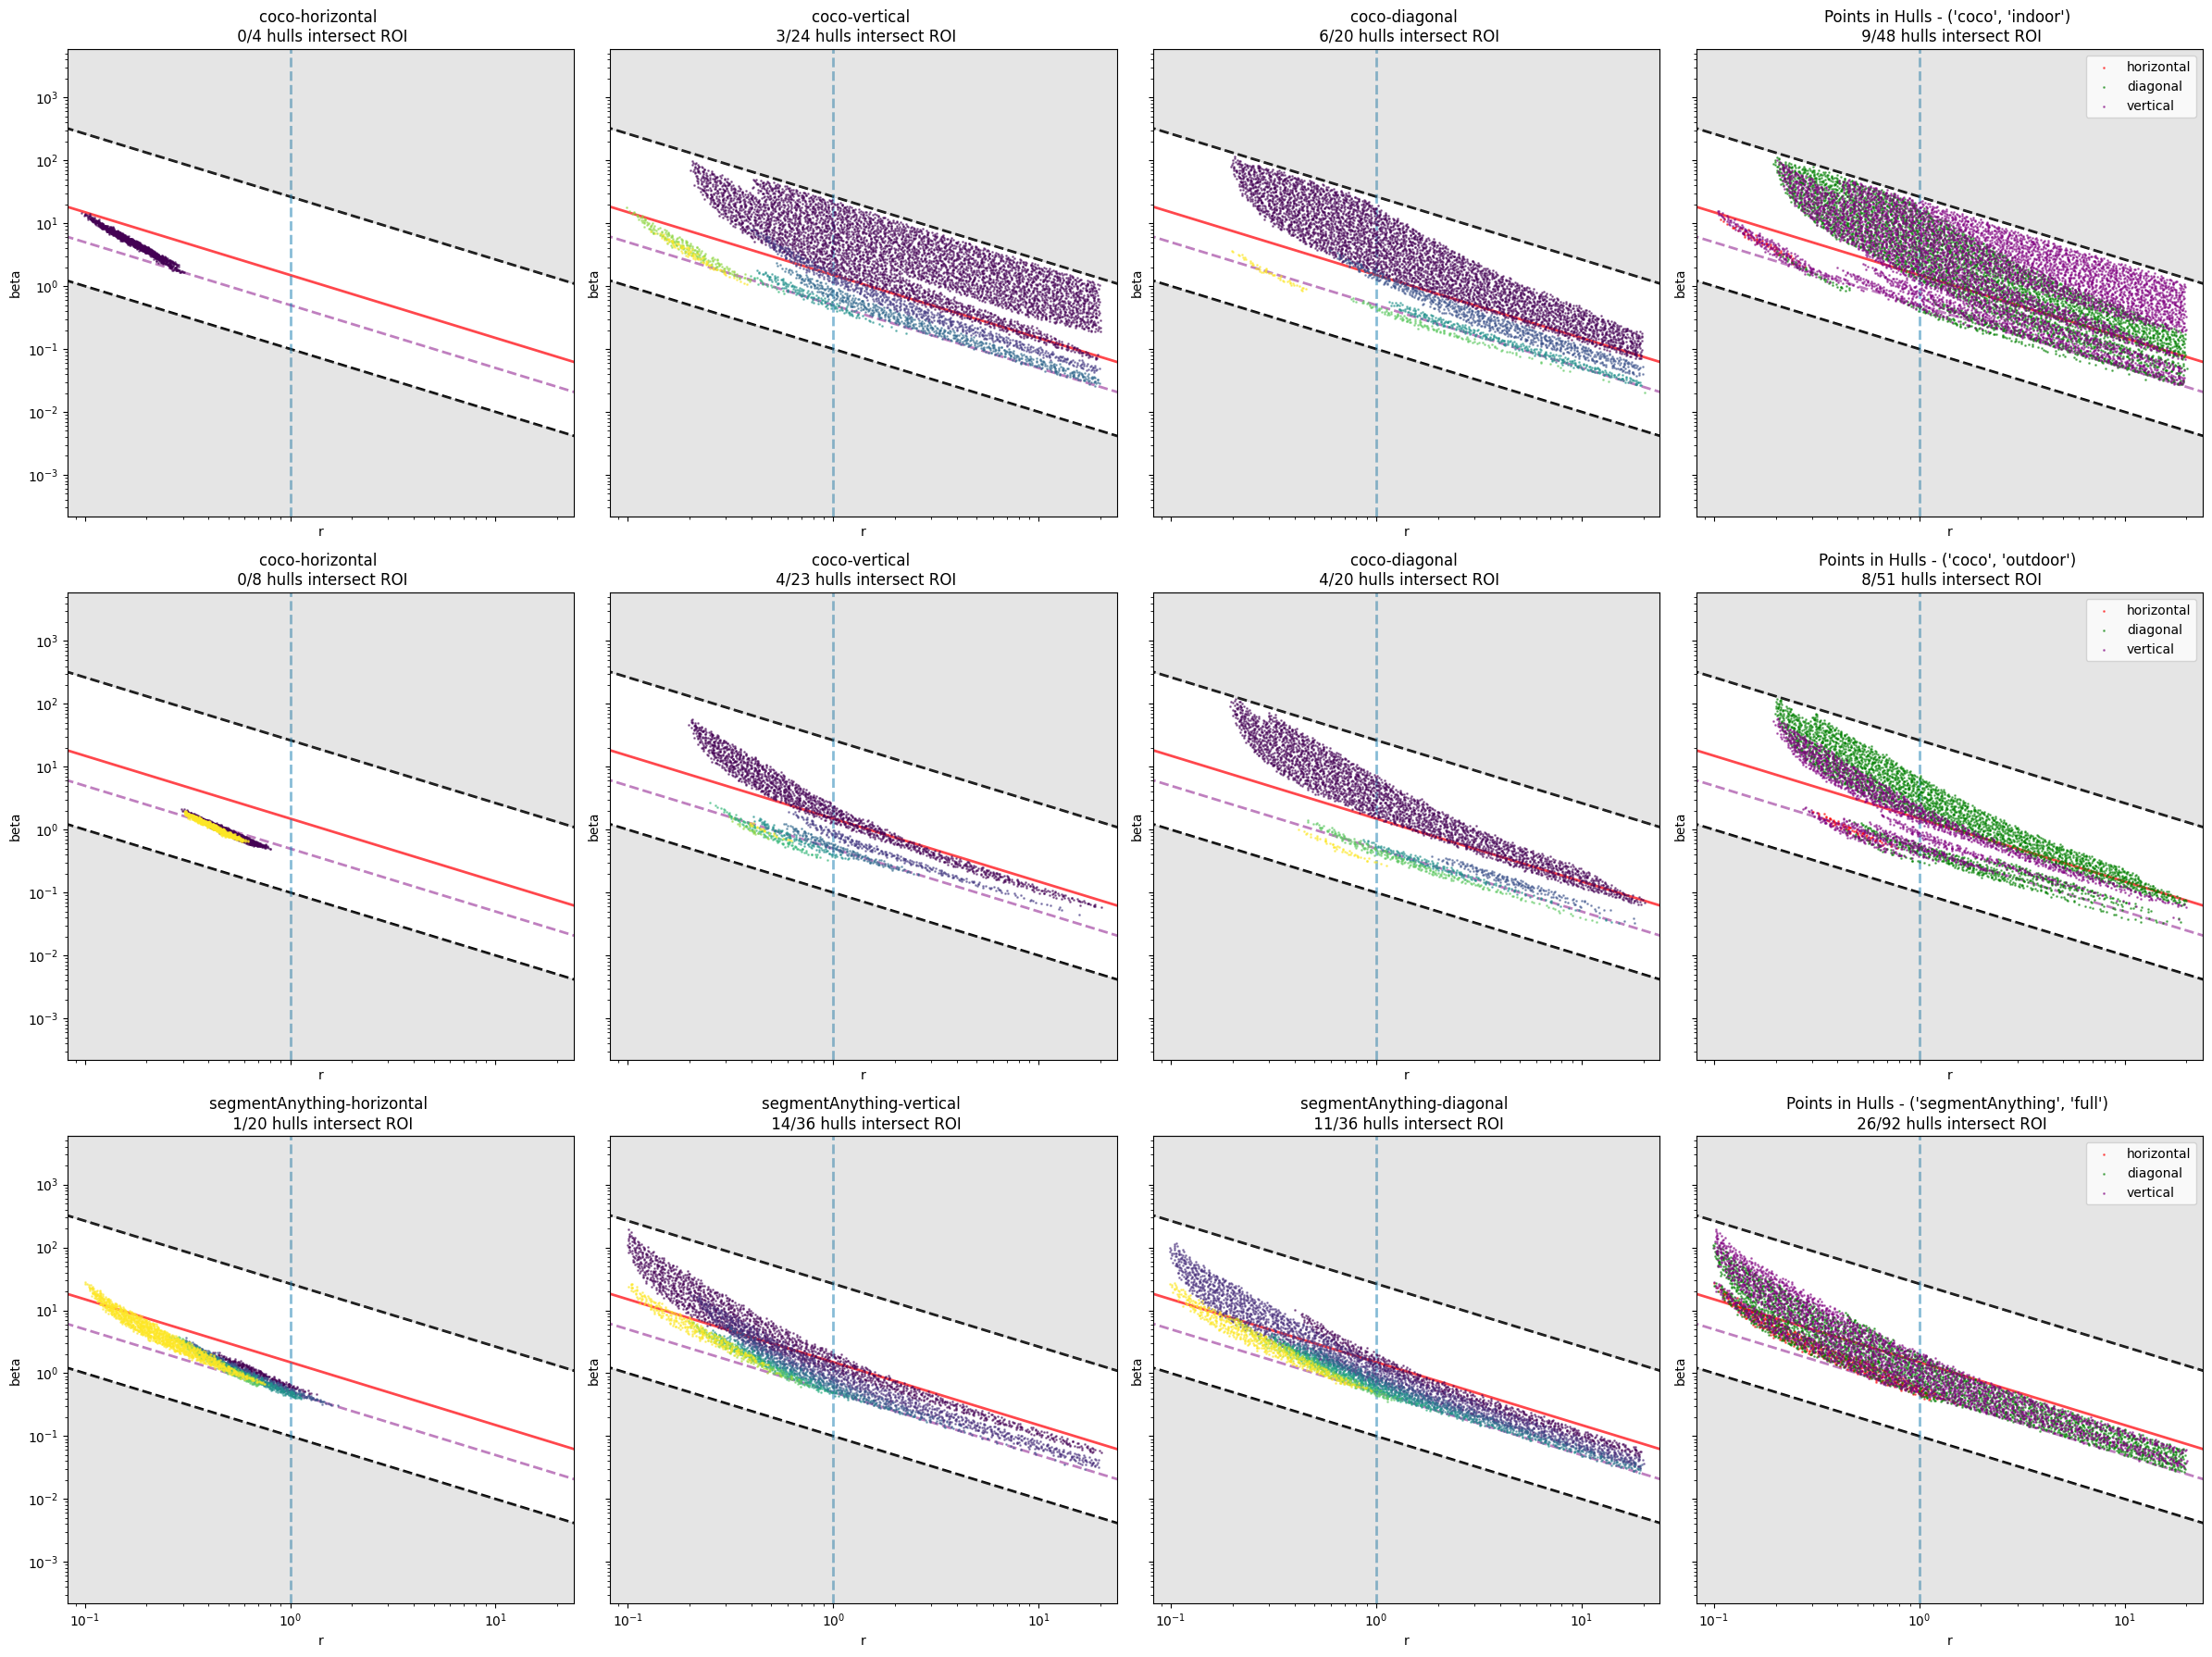

In [6]:
num_points = 150
JITTER_FACTOR = 50
size = 1
datasets = [("coco", "indoor"), ("coco", "outdoor"), ("segmentAnything", "full")]
directions = ["horizontal", "vertical", "diagonal"]


# Add a fourth column to the right for the new plots
fig, axes = plt.subplots(3, 4, figsize=(24, 18), sharex=True, sharey=True)
global_xmax = 0
global_ymax = 0
global_xmin = np.inf
global_ymin = np.inf
for i, DATASET in enumerate(datasets):
    for j, direction in enumerate(directions):
        ax = axes[i, j]
        df = main_df[(main_df["dataset"] == DATASET[0]) & (main_df["subset"] == DATASET[1]) & (main_df["transform"] != "learned") & (main_df["orientation"] == direction)].copy()
        df = df.dropna(subset=["hull"])
        df["best_1/beta"] = 1 / df["best_beta"]
        group_list = df["group"].unique()
        hull_list = []
        all_hulls = []
        for group in group_list:
            hull_list.append(df[df["group"] == group]["hull"])
            all_hulls.extend(df[df["group"] == group]["hull"])
        if len(all_hulls) == 0:
            continue
        all_points = np.vstack([hull.points for hull in all_hulls])
        xmin, xmax = all_points[:, 0].min(), all_points[:, 0].max()
        ymin, ymax = all_points[:, 1].min(), all_points[:, 1].max()

        if xmax > global_xmax:
            global_xmax = xmax
        if ymax > global_ymax:
            global_ymax = ymax
        if xmin < global_xmin:
            global_xmin = xmin
        if ymin < global_ymin:
            global_ymin = ymin
            
        color_map = plt.get_cmap('viridis')
        num_groups = len(group_list)
        group_colors = {group: color_map(idx / max(num_groups - 1, 1)) for idx, group in enumerate(group_list)}
        x_vals = np.logspace(np.log10(xmin), np.log10(xmax), num_points)
        y_vals = np.logspace(np.log10(ymin), np.log10(ymax), num_points)
        
        xx, yy = np.meshgrid(x_vals, y_vals)
        points_grid = np.c_[xx.ravel(), yy.ravel()]
        for k, hull in enumerate(hull_list):
            hull_mask = in_hull_list(points_grid, hull)
            points = points_grid[hull_mask]
            points = points + np.random.normal(scale=points / JITTER_FACTOR, size=points.shape)
            ax.scatter(points[:, 0], 1/points[:, 1], s=size, label=group_list[k], alpha=0.5, color=group_colors[group_list[k]])
        ax.set_xlabel("r")
        ax.set_ylabel("beta")
        ax.set_xscale('log')
        ax.set_yscale('log')
        temp_df = df[df["orientation"] == direction]
        ax.set_title(f"{DATASET[0]}-{direction} \n {sum(temp_df['intersect_roi'])}/{len(temp_df)} hulls intersect ROI")

    # Fourth column: plot by orientation for each DATASET
    ax4 = axes[i, 3]
    df = main_df[(main_df["dataset"] == DATASET[0]) & (main_df["subset"] == DATASET[1]) & (main_df["transform"] != "learned")].copy()
    df = df.dropna(subset=["hull"])
    df["best_1/beta"] = 1 / df["best_beta"]
    if df["dataset_type"].unique()[0] == "remote sensing":
        df["orientation"] = df["orientation"].fillna("fourier")
    orientation_list = df["orientation"].unique()
    hull_list = []
    all_hulls = []
    for orientation in orientation_list:
        hull_list.append(df[df["orientation"] == orientation]["hull"])
        all_hulls.extend(df[df["orientation"] == orientation]["hull"])
    if len(all_hulls) == 0:
        continue
    all_points = np.vstack([hull.points for hull in all_hulls])
    xmin, xmax = all_points[:, 0].min(), all_points[:, 0].max()
    ymin, ymax = all_points[:, 1].min(), all_points[:, 1].max()
    orientation_colors = {"horizVert": "blue", "diagonal": "green", "fourier": "orange", "vertical": "purple", "horizontal": "red"}
    x_vals = np.logspace(np.log10(xmin), np.log10(xmax), num_points)
    y_vals = np.logspace(np.log10(ymin), np.log10(ymax), num_points)
    
    xx, yy = np.meshgrid(x_vals, y_vals)
    points_grid = np.c_[xx.ravel(), yy.ravel()]
    for k, hull in enumerate(hull_list):
        hull_mask = in_hull_list(points_grid, hull)
        points = points_grid[hull_mask]
        points = points + np.random.normal(scale=points / JITTER_FACTOR, size=points.shape)
        ax4.scatter(points[:, 0], 1/points[:, 1], s=size, label=orientation_list[k], alpha=0.5, color=orientation_colors[orientation_list[k]])
    ax4.set_xlabel("r")
    ax4.set_ylabel("beta")
    ax4.set_xscale('log')
    ax4.set_yscale('log')
    ax4.set_title(f"Points in Hulls - {DATASET} \n {sum(df['intersect_roi'])}/{len(df)} hulls intersect ROI")
    ax4.legend()

for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        ax = axes[i, j]
        x_vals_global = np.logspace(np.log10(global_xmin) -1 , np.log10(global_xmax+1) + 1, num_points)
        eta_vals_global = 0 * np.zeros_like(x_vals_global)
        eta_roi_lower = -0.1 * np.zeros_like(x_vals_global)
        eta_roi_upper = 0.1 * np.zeros_like(x_vals_global)
        eta_20_vals_global = 25 + np.zeros_like(x_vals_global)
        eta_lower_global = -1.4 + np.zeros_like(x_vals_global)
        eta_neg_1 = -1 + np.zeros_like(x_vals_global)
        
        roi_global = (eta_vals_global + 1.5) / x_vals_global
        roi_lower = (eta_roi_lower + 1.5) / x_vals_global
        roi_upper = (eta_roi_upper + 1.5) / x_vals_global
        beta_20_global = (eta_20_vals_global + 1.5) / x_vals_global
        beta_lower_global = (eta_lower_global + 1.5) / x_vals_global
        beta_neg_1_global = (eta_neg_1 + 1.5) / x_vals_global
        
        ax.plot(x_vals_global, roi_global, color='xkcd:light red', linestyle='-', label='ROI', zorder=0, linewidth=2)
       #ax.fill_between(x_vals_global, roi_lower, roi_upper, color='xkcd:light red')
        ax.plot(x_vals_global, beta_20_global, color='black', linestyle='--', label='ROI', zorder=0, linewidth=2)
        ax.plot(x_vals_global, beta_lower_global, color='black', linestyle='--', label='ROI', zorder=0, linewidth=2)
        ax.plot(x_vals_global, beta_neg_1_global, color='purple', linestyle='--', label='ROI', zorder=0, linewidth=2, alpha=0.5)
        ax.axvline(x=1, color='xkcd:nice blue', linestyle='--', label='r=1', zorder=0, linewidth=2, alpha=0.5)

        

        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        ax.fill_between(x_vals_global, ylim[0], beta_lower_global, color='gray', alpha=0.2)
        ax.fill_between(x_vals_global, ylim[1], beta_20_global, color='gray', alpha=0.2)

        ax.set_xlabel("r")
        ax.set_ylabel("beta")
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlim(global_xmin/1.2, global_xmax*1.2)
        ax.set_ylim(ylim)
        #ax.set_ylim(global_ymin, global_ymax)
       
plt.tight_layout()
plt.show()

    
if SAVE_FIGS:
    fig.savefig(os.path.join(plots_path, "region_pointalism_remote_sensing.png"), bbox_inches='tight', dpi=1000)

# Medical

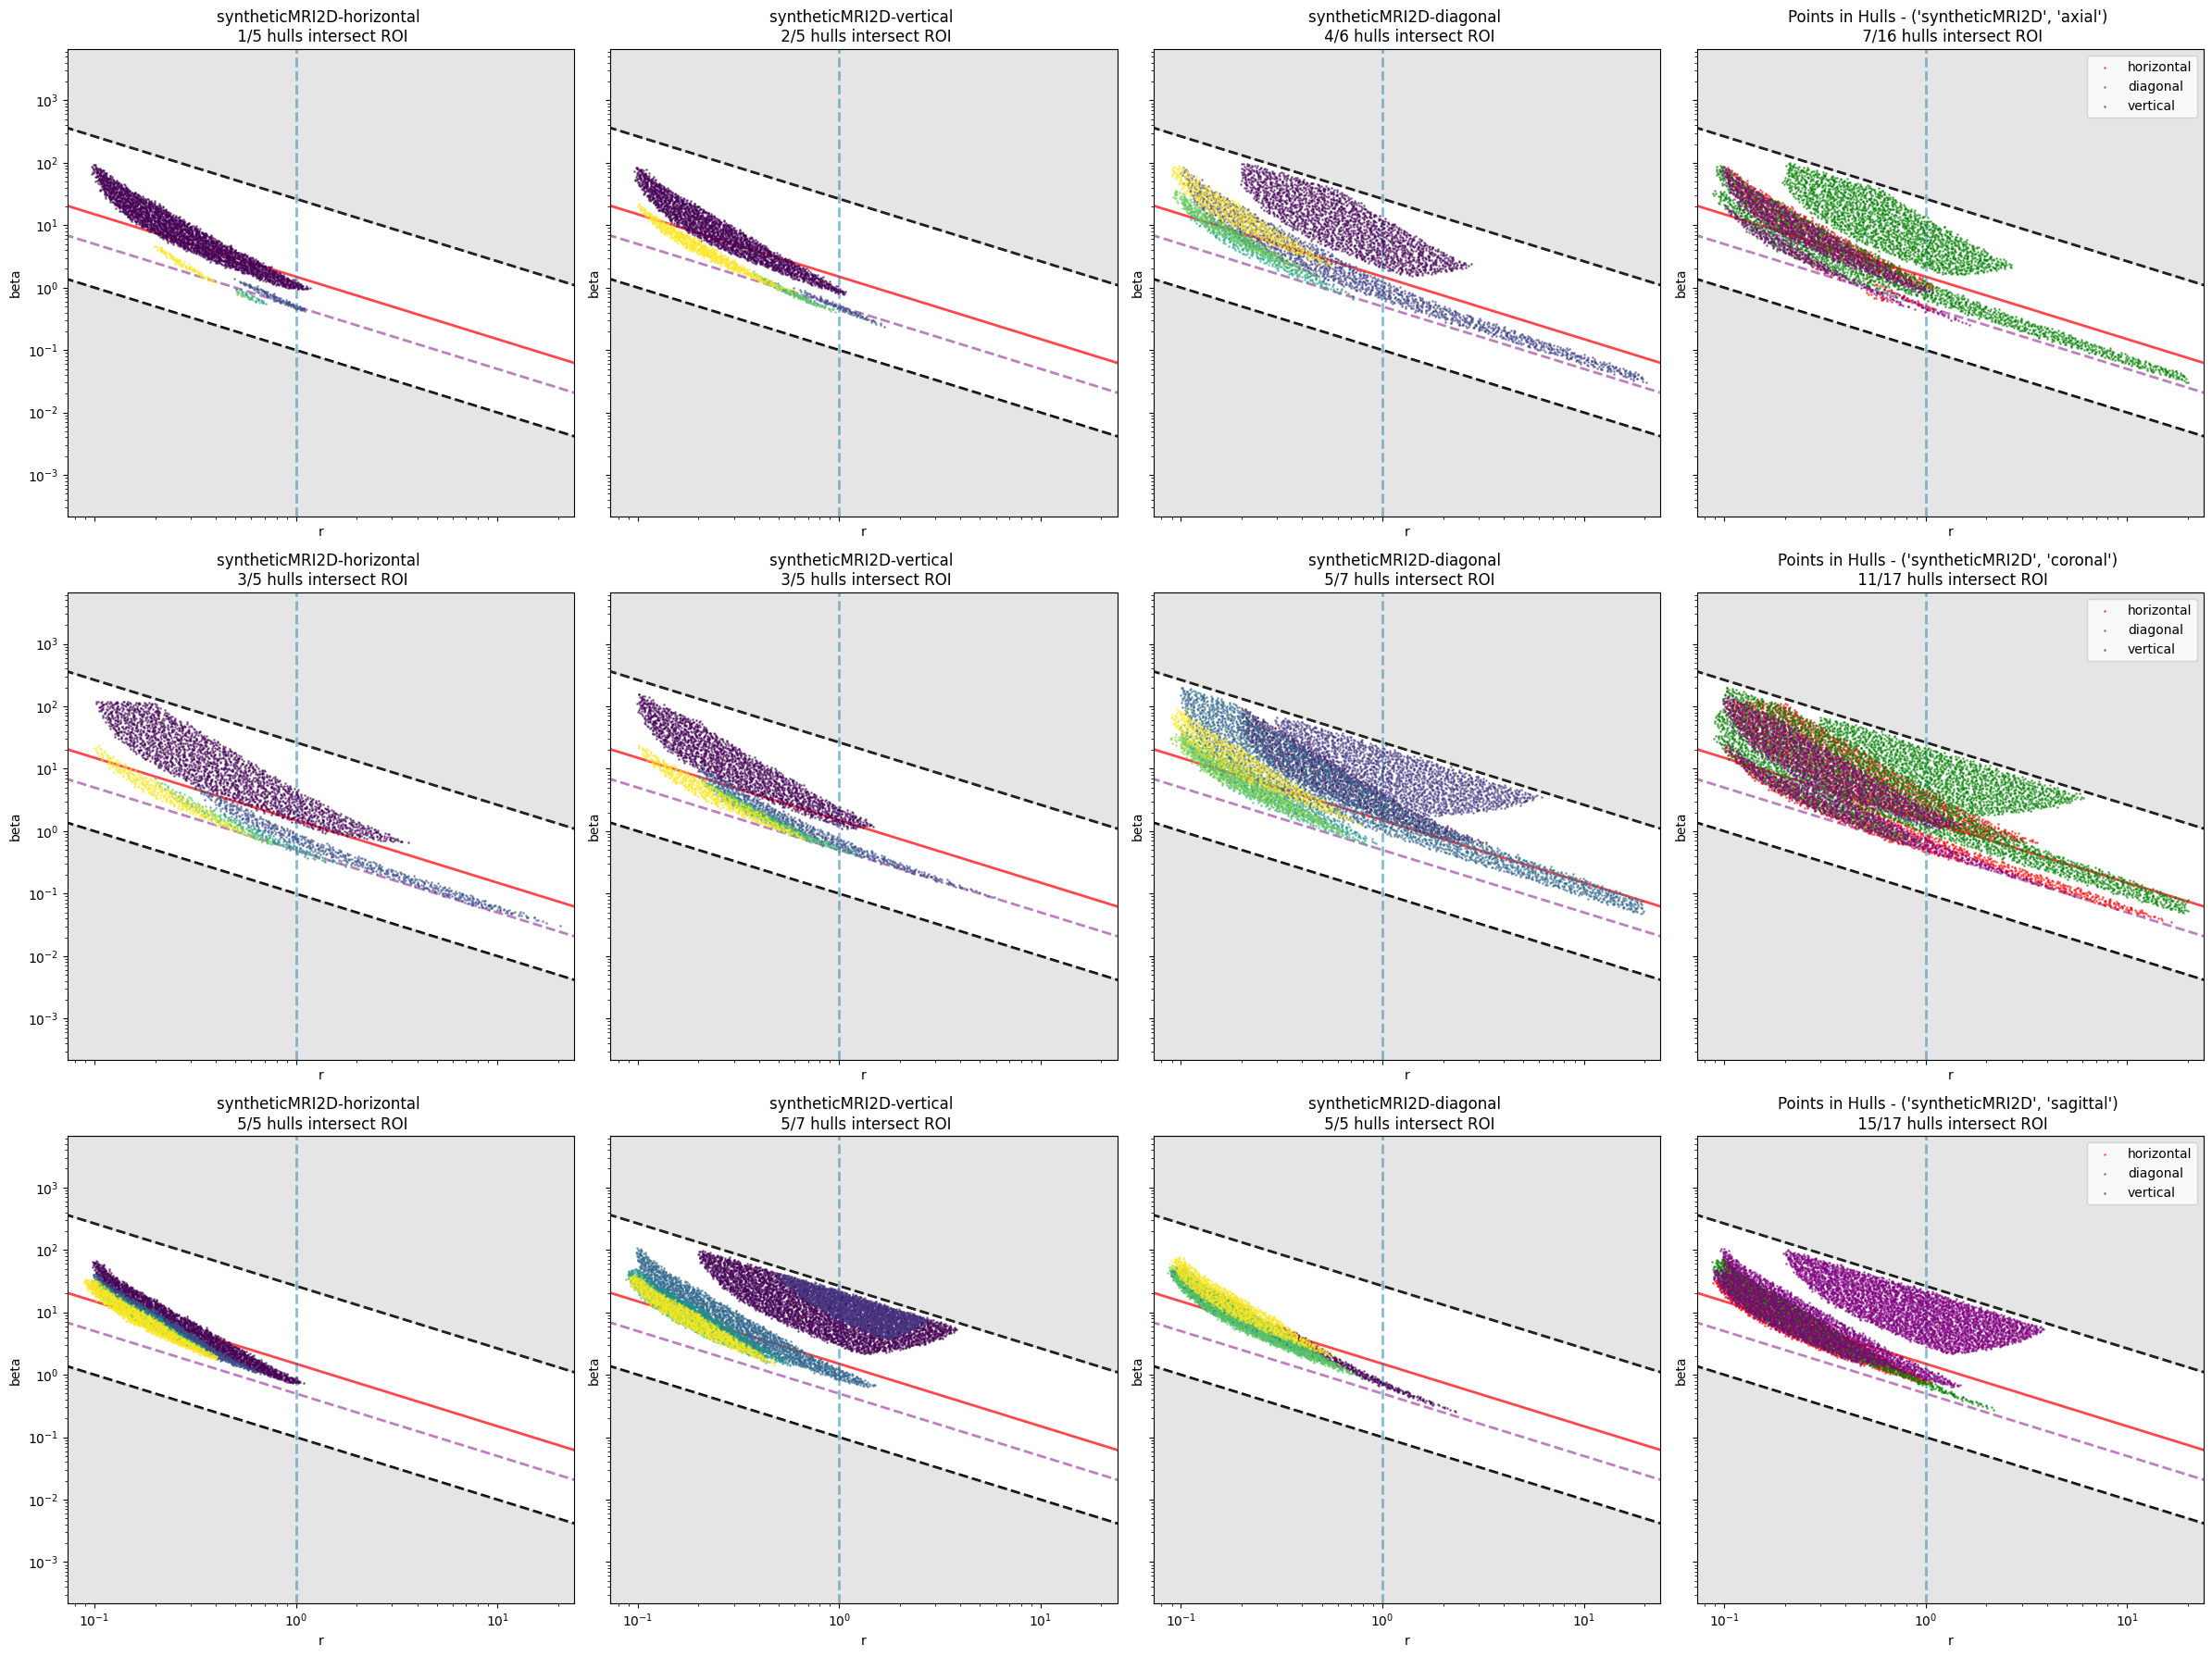

In [7]:
num_points = 150
JITTER_FACTOR = 50
size = 1
datasets = [("syntheticMRI2D", "axial"), ("syntheticMRI2D", "coronal"), ("syntheticMRI2D", "sagittal")]
directions = ["horizontal", "vertical", "diagonal"]


# Add a fourth column to the right for the new plots
fig, axes = plt.subplots(3, 4, figsize=(24, 18), sharex=True, sharey=True)
global_xmax = 0
global_ymax = 0
global_xmin = np.inf
global_ymin = np.inf
for i, DATASET in enumerate(datasets):
    for j, direction in enumerate(directions):
        ax = axes[i, j]
        df = main_df[(main_df["dataset"] == DATASET[0]) & (main_df["subset"] == DATASET[1]) & (main_df["transform"] != "learned") & (main_df["orientation"] == direction)].copy()
        df = df.dropna(subset=["hull"])
        df["best_1/beta"] = 1 / df["best_beta"]
        group_list = df["group"].unique()
        hull_list = []
        all_hulls = []
        for group in group_list:
            hull_list.append(df[df["group"] == group]["hull"])
            all_hulls.extend(df[df["group"] == group]["hull"])
        if len(all_hulls) == 0:
            continue
        all_points = np.vstack([hull.points for hull in all_hulls])
        xmin, xmax = all_points[:, 0].min(), all_points[:, 0].max()
        ymin, ymax = all_points[:, 1].min(), all_points[:, 1].max()

        if xmax > global_xmax:
            global_xmax = xmax
        if ymax > global_ymax:
            global_ymax = ymax
        if xmin < global_xmin:
            global_xmin = xmin
        if ymin < global_ymin:
            global_ymin = ymin
            
        color_map = plt.get_cmap('viridis')
        num_groups = len(group_list)
        group_colors = {group: color_map(idx / max(num_groups - 1, 1)) for idx, group in enumerate(group_list)}
        x_vals = np.logspace(np.log10(xmin), np.log10(xmax), num_points)
        y_vals = np.logspace(np.log10(ymin), np.log10(ymax), num_points)
        
        xx, yy = np.meshgrid(x_vals, y_vals)
        points_grid = np.c_[xx.ravel(), yy.ravel()]
        for k, hull in enumerate(hull_list):
            hull_mask = in_hull_list(points_grid, hull)
            points = points_grid[hull_mask]
            points = points + np.random.normal(scale=points / JITTER_FACTOR, size=points.shape)
            ax.scatter(points[:, 0], 1/points[:, 1], s=size, label=group_list[k], alpha=0.5, color=group_colors[group_list[k]])
        ax.set_xlabel("r")
        ax.set_ylabel("beta")
        ax.set_xscale('log')
        ax.set_yscale('log')
        temp_df = df[df["orientation"] == direction]
        ax.set_title(f"{DATASET[0]}-{direction} \n {sum(temp_df['intersect_roi'])}/{len(temp_df)} hulls intersect ROI")

    # Fourth column: plot by orientation for each DATASET
    ax4 = axes[i, 3]
    df = main_df[(main_df["dataset"] == DATASET[0]) & (main_df["subset"] == DATASET[1]) & (main_df["transform"] != "learned")].copy()
    df = df.dropna(subset=["hull"])
    df["best_1/beta"] = 1 / df["best_beta"]
    if df["dataset_type"].unique()[0] == "remote sensing":
        df["orientation"] = df["orientation"].fillna("fourier")
    orientation_list = df["orientation"].unique()
    hull_list = []
    all_hulls = []
    for orientation in orientation_list:
        hull_list.append(df[df["orientation"] == orientation]["hull"])
        all_hulls.extend(df[df["orientation"] == orientation]["hull"])
    if len(all_hulls) == 0:
        continue
    all_points = np.vstack([hull.points for hull in all_hulls])
    xmin, xmax = all_points[:, 0].min(), all_points[:, 0].max()
    ymin, ymax = all_points[:, 1].min(), all_points[:, 1].max()
    orientation_colors = {"horizVert": "blue", "diagonal": "green", "fourier": "orange", "vertical": "purple", "horizontal": "red"}
    x_vals = np.logspace(np.log10(xmin), np.log10(xmax), num_points)
    y_vals = np.logspace(np.log10(ymin), np.log10(ymax), num_points)
    
    xx, yy = np.meshgrid(x_vals, y_vals)
    points_grid = np.c_[xx.ravel(), yy.ravel()]
    for k, hull in enumerate(hull_list):
        hull_mask = in_hull_list(points_grid, hull)
        points = points_grid[hull_mask]
        points = points + np.random.normal(scale=points / JITTER_FACTOR, size=points.shape)
        ax4.scatter(points[:, 0], 1/points[:, 1], s=size, label=orientation_list[k], alpha=0.5, color=orientation_colors[orientation_list[k]])
    ax4.set_xlabel("r")
    ax4.set_ylabel("beta")
    ax4.set_xscale('log')
    ax4.set_yscale('log')
    ax4.set_title(f"Points in Hulls - {DATASET} \n {sum(df['intersect_roi'])}/{len(df)} hulls intersect ROI")
    ax4.legend()

for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        ax = axes[i, j]
        x_vals_global = np.logspace(np.log10(global_xmin) -1 , np.log10(global_xmax+1) + 1, num_points)
        eta_vals_global = 0 * np.zeros_like(x_vals_global)
        eta_roi_lower = -0.1 * np.zeros_like(x_vals_global)
        eta_roi_upper = 0.1 * np.zeros_like(x_vals_global)
        eta_20_vals_global = 25 + np.zeros_like(x_vals_global)
        eta_lower_global = -1.4 + np.zeros_like(x_vals_global)
        eta_neg_1 = -1 + np.zeros_like(x_vals_global)
        
        roi_global = (eta_vals_global + 1.5) / x_vals_global
        roi_lower = (eta_roi_lower + 1.5) / x_vals_global
        roi_upper = (eta_roi_upper + 1.5) / x_vals_global
        beta_20_global = (eta_20_vals_global + 1.5) / x_vals_global
        beta_lower_global = (eta_lower_global + 1.5) / x_vals_global
        beta_neg_1_global = (eta_neg_1 + 1.5) / x_vals_global
        
        ax.plot(x_vals_global, roi_global, color='xkcd:light red', linestyle='-', label='ROI', zorder=0, linewidth=2)
       #ax.fill_between(x_vals_global, roi_lower, roi_upper, color='xkcd:light red')
        ax.plot(x_vals_global, beta_20_global, color='black', linestyle='--', label='ROI', zorder=0, linewidth=2)
        ax.plot(x_vals_global, beta_lower_global, color='black', linestyle='--', label='ROI', zorder=0, linewidth=2)
        ax.plot(x_vals_global, beta_neg_1_global, color='purple', linestyle='--', label='ROI', zorder=0, linewidth=2, alpha=0.5)
        ax.axvline(x=1, color='xkcd:nice blue', linestyle='--', label='r=1', zorder=0, linewidth=2, alpha=0.5)

        

        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        ax.fill_between(x_vals_global, ylim[0], beta_lower_global, color='gray', alpha=0.2)
        ax.fill_between(x_vals_global, ylim[1], beta_20_global, color='gray', alpha=0.2)

        ax.set_xlabel("r")
        ax.set_ylabel("beta")
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlim(global_xmin/1.2, global_xmax*1.2)
        ax.set_ylim(ylim)
        #ax.set_ylim(global_ymin, global_ymax)
       
plt.tight_layout()
plt.show()

    
if SAVE_FIGS:
    fig.savefig(os.path.join(plots_path, "region_pointalism_remote_sensing.png"), bbox_inches='tight', dpi=1000)

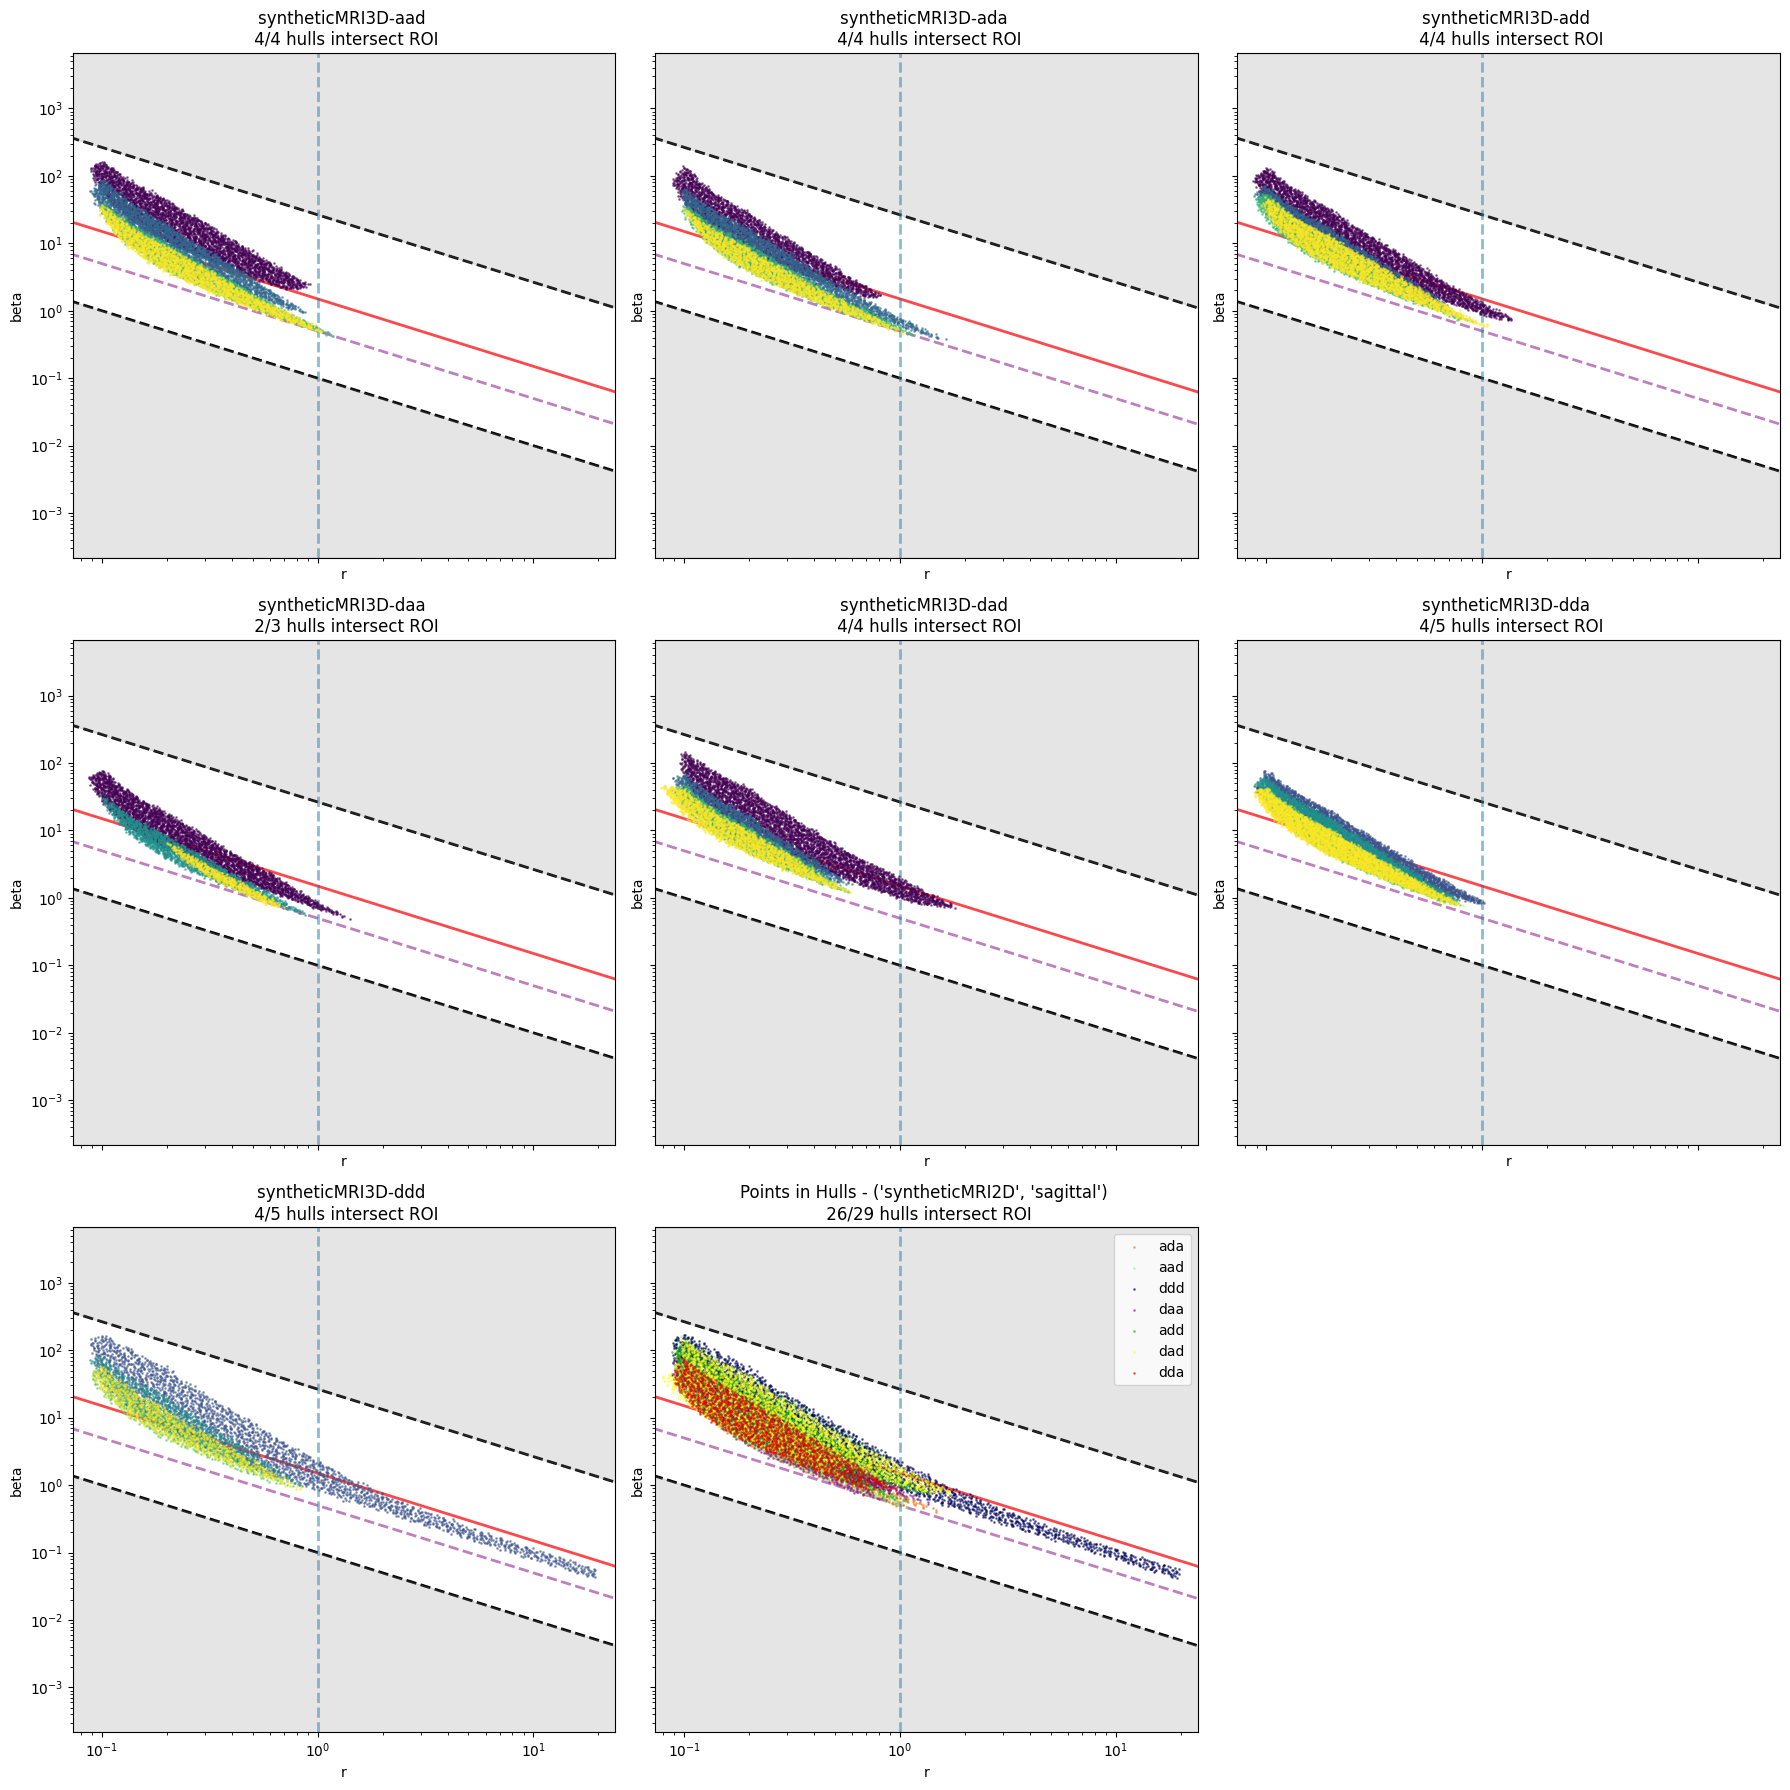

In [8]:
num_points = 150
JITTER_FACTOR = 50
size = 1
datasets = [("syntheticMRI3D", "full")]
directions = ["aad", "ada", "add", "daa", "dad", "dda", "ddd", "aaa"]

fig, axes = plt.subplots(3, 3, figsize=(18, 18), sharex=True, sharey=True)
color_map = plt.get_cmap('tab10')

for idx, direction in enumerate(directions):
    i, j = divmod(idx, 3)
    ax = axes[i, j]
    df = main_df[(main_df["dataset"] == datasets[0][0]) & (main_df["subset"] == datasets[0][1]) & (main_df["transform"] != "learned") & (main_df["orientation"] == direction)].copy()
    df = df.dropna(subset=["hull"])
    df["best_1/beta"] = 1 / df["best_beta"]
    group_list = df["group"].unique()
    hull_list = []
    all_hulls = []
    for group in group_list:
        hull_list.append(df[df["group"] == group]["hull"])
        all_hulls.extend(df[df["group"] == group]["hull"])
    if len(all_hulls) == 0:
        continue
    all_points = np.vstack([hull.points for hull in all_hulls])
    xmin, xmax = all_points[:, 0].min(), all_points[:, 0].max()
    ymin, ymax = all_points[:, 1].min(), all_points[:, 1].max()
    x_vals = np.logspace(np.log10(xmin), np.log10(xmax), num_points)
    y_vals = np.logspace(np.log10(ymin), np.log10(ymax), num_points)
    xx, yy = np.meshgrid(x_vals, y_vals)
    points_grid = np.c_[xx.ravel(), yy.ravel()]
    color_map = plt.get_cmap('viridis')
    # Use equally spaced colors from the colormap for each group
    num_groups = len(group_list)
    group_colors = {group: color_map(idx / max(num_groups - 1, 1)) for idx, group in enumerate(group_list)}
    
    for k, hull in enumerate(hull_list):
        hull_mask = in_hull_list(points_grid, hull)
        points = points_grid[hull_mask]
        points = points + np.random.normal(scale=points / JITTER_FACTOR, size=points.shape)
        # Use group_colors with correct index for each group
        ax.scatter(points[:, 0], 1/points[:, 1], s=size, label=f"{group_list[k]}", alpha=0.5, color=color_map(k / max(len(hull_list) - 1, 1)))

    ax.set_xlabel("r")
    ax.set_ylabel("1/beta")
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title(f"{datasets[0][0]}-{datasets[0][1]}-{direction}")
    temp_df = df[df["orientation"] == direction]
    ax.set_title(f"{datasets[0][0]}-{direction} \n {sum(temp_df['intersect_roi'])}/{len(temp_df)} hulls intersect ROI")

# Hide the last (bottom right) subplot
axes[2, 2].axis('off')

# Fourth column: plot by orientation for each DATASET
ax4 = axes[2, 1]
df = main_df[(main_df["dataset"] == datasets[0][0]) & (main_df["subset"] == datasets[0][1]) & (main_df["transform"] != "learned")].copy()
df = df.dropna(subset=["hull"])
df["best_1/beta"] = 1 / df["best_beta"]
if df["dataset_type"].unique()[0] == "remote sensing":
    df["orientation"] = df["orientation"].fillna("fourier")
orientation_list = df["orientation"].unique()
hull_list = []
all_hulls = []
for orientation in orientation_list:
    hull_list.append(df[df["orientation"] == orientation]["hull"])
    all_hulls.extend(df[df["orientation"] == orientation]["hull"])

all_points = np.vstack([hull.points for hull in all_hulls])
xmin, xmax = all_points[:, 0].min(), all_points[:, 0].max()
ymin, ymax = all_points[:, 1].min(), all_points[:, 1].max()
orientation_colors = {
    'aad': 'xkcd:light green',
    'ada': 'xkcd:orange',
    'add': 'xkcd:green',
    'daa': 'xkcd:purple',
    'dad': 'xkcd:yellow',
    'dda': 'xkcd:red',
    'ddd': 'xkcd:dark blue'
}
x_vals = np.logspace(np.log10(xmin), np.log10(xmax), num_points)
y_vals = np.logspace(np.log10(ymin), np.log10(ymax), num_points)

xx, yy = np.meshgrid(x_vals, y_vals)
points_grid = np.c_[xx.ravel(), yy.ravel()]
for k, hull in enumerate(hull_list):
    hull_mask = in_hull_list(points_grid, hull)
    points = points_grid[hull_mask]
    points = points + np.random.normal(scale=points / JITTER_FACTOR, size=points.shape)
    ax4.scatter(points[:, 0], 1/points[:, 1], s=size, label=orientation_list[k], alpha=0.5, color=orientation_colors[orientation_list[k]])
ax4.set_xlabel("r")
ax4.set_ylabel("beta")
ax4.set_xscale('log')
ax4.set_yscale('log')
ax4.set_title(f"Points in Hulls - {DATASET} \n {sum(df['intersect_roi'])}/{len(df)} hulls intersect ROI")
ax4.legend()

for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        ax = axes[i, j]
        x_vals_global = np.logspace(np.log10(global_xmin) -1 , np.log10(global_xmax+1) + 1, num_points)
        eta_vals_global = 0 * np.zeros_like(x_vals_global)
        eta_roi_lower = -0.1 * np.zeros_like(x_vals_global)
        eta_roi_upper = 0.1 * np.zeros_like(x_vals_global)
        eta_20_vals_global = 25 + np.zeros_like(x_vals_global)
        eta_lower_global = -1.4 + np.zeros_like(x_vals_global)
        eta_neg_1 = -1 + np.zeros_like(x_vals_global)
        
        roi_global = (eta_vals_global + 1.5) / x_vals_global
        roi_lower = (eta_roi_lower + 1.5) / x_vals_global
        roi_upper = (eta_roi_upper + 1.5) / x_vals_global
        beta_20_global = (eta_20_vals_global + 1.5) / x_vals_global
        beta_lower_global = (eta_lower_global + 1.5) / x_vals_global
        beta_neg_1_global = (eta_neg_1 + 1.5) / x_vals_global
        
        ax.plot(x_vals_global, roi_global, color='xkcd:light red', linestyle='-', label='ROI', zorder=0, linewidth=2)
       #ax.fill_between(x_vals_global, roi_lower, roi_upper, color='xkcd:light red')
        ax.plot(x_vals_global, beta_20_global, color='black', linestyle='--', label='ROI', zorder=0, linewidth=2)
        ax.plot(x_vals_global, beta_lower_global, color='black', linestyle='--', label='ROI', zorder=0, linewidth=2)
        ax.plot(x_vals_global, beta_neg_1_global, color='purple', linestyle='--', label='ROI', zorder=0, linewidth=2, alpha=0.5)
        ax.axvline(x=1, color='xkcd:nice blue', linestyle='--', label='r=1', zorder=0, linewidth=2, alpha=0.5)

        

        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        ax.fill_between(x_vals_global, ylim[0], beta_lower_global, color='gray', alpha=0.2)
        ax.fill_between(x_vals_global, ylim[1], beta_20_global, color='gray', alpha=0.2)

        ax.set_xlabel("r")
        ax.set_ylabel("beta")
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlim(global_xmin/1.2, global_xmax*1.2)
        ax.set_ylim(ylim)
        #ax.set_ylim(global_ymin, global_ymax)
        # Hide the bottom right plot (axes[2, 2])
axes[2, 2].set_visible(False)
plt.tight_layout()
plt.show()

    
if SAVE_FIGS:
    fig.savefig(os.path.join(plots_path, "region_pointalism_remote_sensing.png"), bbox_inches='tight', dpi=1000)